In [1]:
# Part 2 Problem 1
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
# Problem 1(a)
NUM_OF_NODES <- 1000
g <- erdos.renyi.game(NUM_OF_NODES, 0.01, directed=F)
# plot(g, vertex.size=1, vertex.label=NA, main="Erdos-Renyi Network with 1000 Nodes and Edge Probability 0.01")

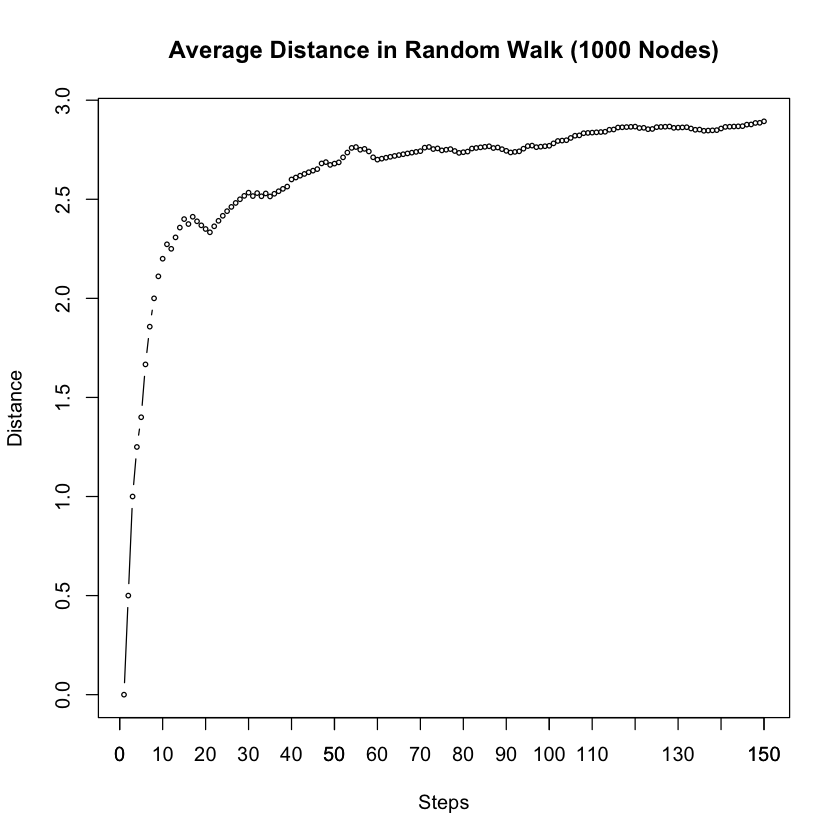

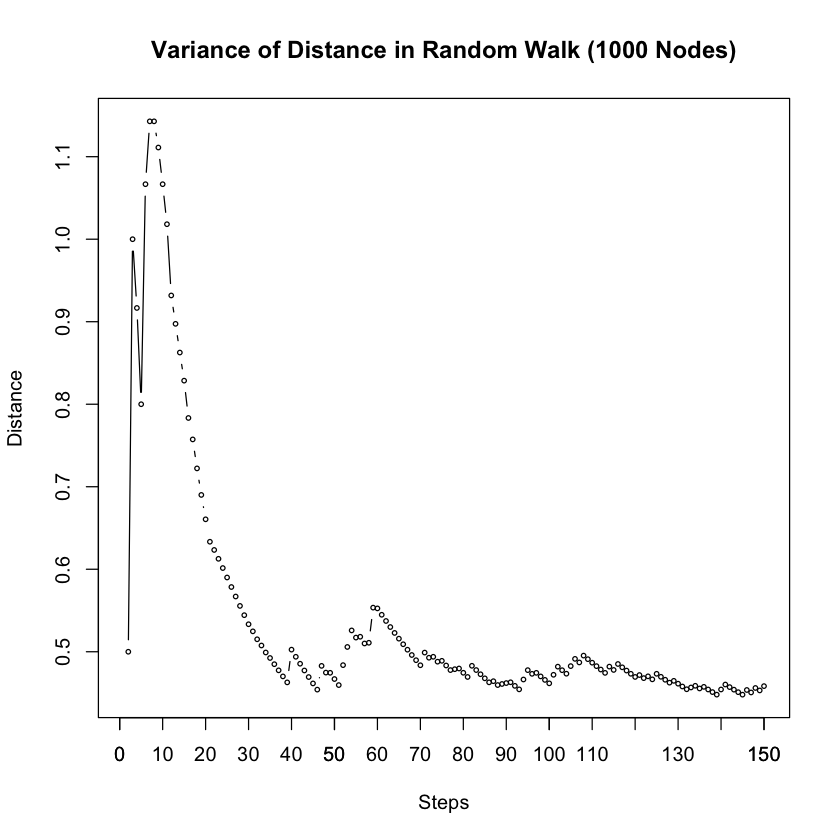

In [3]:
# Problem 1(b)
NUM_STARTING_NODES <- 100
RANDOM_WALK_STEPS <- 150
dist <- list()  # a list of vectors tracking shortest distance between starting node and current node, indexed by [[# of steps]][# of trials]

# Initialization
for (i in 1:RANDOM_WALK_STEPS) {
  dist[[i]] <- c(0)
}

for (i in 1:NUM_STARTING_NODES) {
  node_num <- runif(1, 1, NUM_OF_NODES)  # a randomly selected node
  rw <- random_walk(g, node_num, RANDOM_WALK_STEPS, mode="all", stuck="error")

  for (steps in 1:RANDOM_WALK_STEPS) {
    dist[[steps]][i] <- distances(g, rw[1], rw[steps], mode="all")[1][1]
  } 
}

dist_mean <- unlist(lapply(dist, mean))
dist_var <- unlist(lapply(dist, var))

plot(dist_mean, type='b', cex=0.5,
     main="Average Distance in Random Walk (1000 Nodes)", xlab="Steps", ylab="Distance")
axis(side=1, at=seq(0, RANDOM_WALK_STEPS, by=10))
plot(dist_var, type='b', cex=0.5,
     main="Variance of Distance in Random Walk (1000 Nodes)", xlab="Steps", ylab="Distance") 
axis(side=1, at=seq(0, RANDOM_WALK_STEPS, by=10))

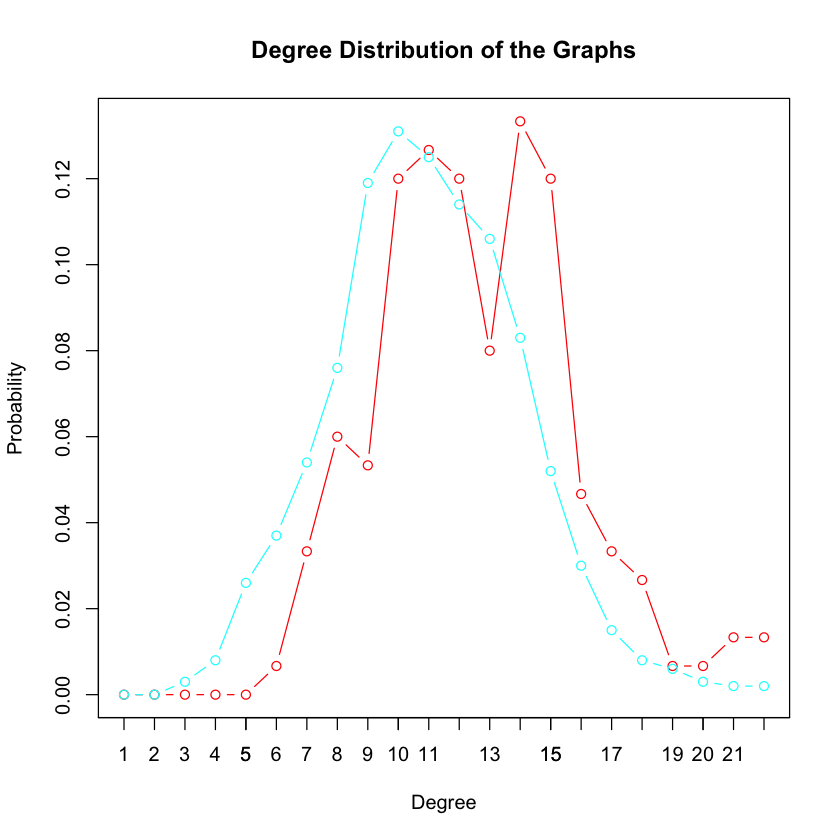

In [4]:
# Problem 1(c)
plot(degree.distribution(g, v=rw), type='b', col=rainbow(2)[1],
     main="Degree Distribution of the Graphs", xlab="Degree", ylab="Probability")
lines(degree.distribution(g), type='b', col=rainbow(2)[2])
legend(1, 0.16, legend=c("The Random Walk Graph", "The Original Graph"), lty=1, col=c(rainbow(2)[1], rainbow(2)[2]))
axis(side=1, at=seq(0, 25, by=1))

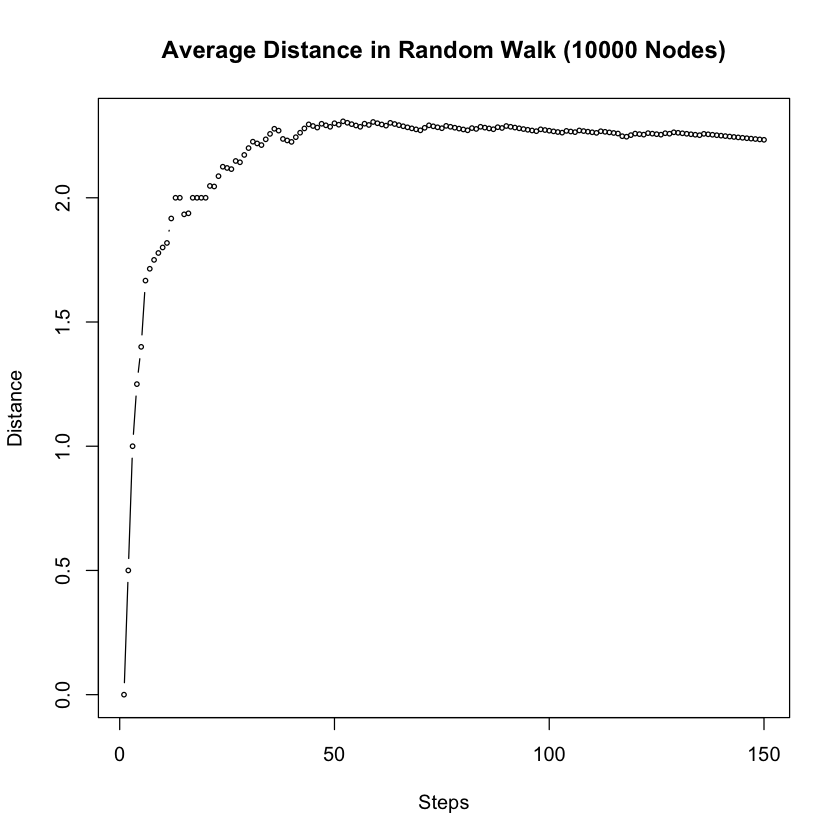

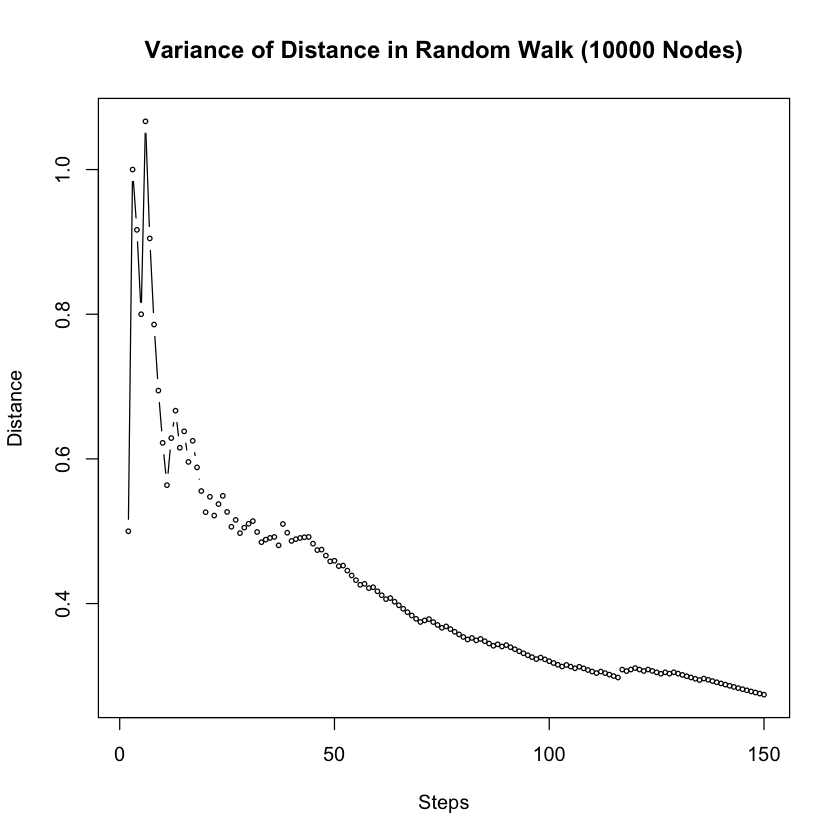

In [5]:
# Problem 1(d)
NUM_OF_NODES <- 10000
g <- erdos.renyi.game(NUM_OF_NODES, 0.01, directed=F)

NUM_STARTING_NODES <- 100
RANDOM_WALK_STEPS <- 150
dist <- list()  # a list of vectors tracking shortest distance between starting node and current node, indexed by [[# of steps]][# of trials]

for (i in 1:RANDOM_WALK_STEPS) {
  dist[[i]] <- c(0)
}

for (i in 1:NUM_STARTING_NODES) {
  node_num <- runif(1, 1, NUM_OF_NODES)  # a randomly selected node
  rw <- random_walk(g, node_num, RANDOM_WALK_STEPS, mode="all", stuck="error")
  
  for (steps in 1:RANDOM_WALK_STEPS) {
    dist[[steps]][i] <- distances(g, rw[1], rw[steps], mode="all")[1][1]
  } 
}

dist_mean <- unlist(lapply(dist, mean))
dist_var <- unlist(lapply(dist, var))

plot(dist_mean, type='b', cex=0.5,
     main="Average Distance in Random Walk (10000 Nodes)", xlab="Steps", ylab="Distance")
axis(side=1, at=seq(0, RANDOM_WALK_STEPS, by=10))
plot(dist_var, type='b', cex=0.5,
     main="Variance of Distance in Random Walk (10000 Nodes)", xlab="Steps", ylab="Distance") 
axis(side=1, at=seq(0, RANDOM_WALK_STEPS, by=10))

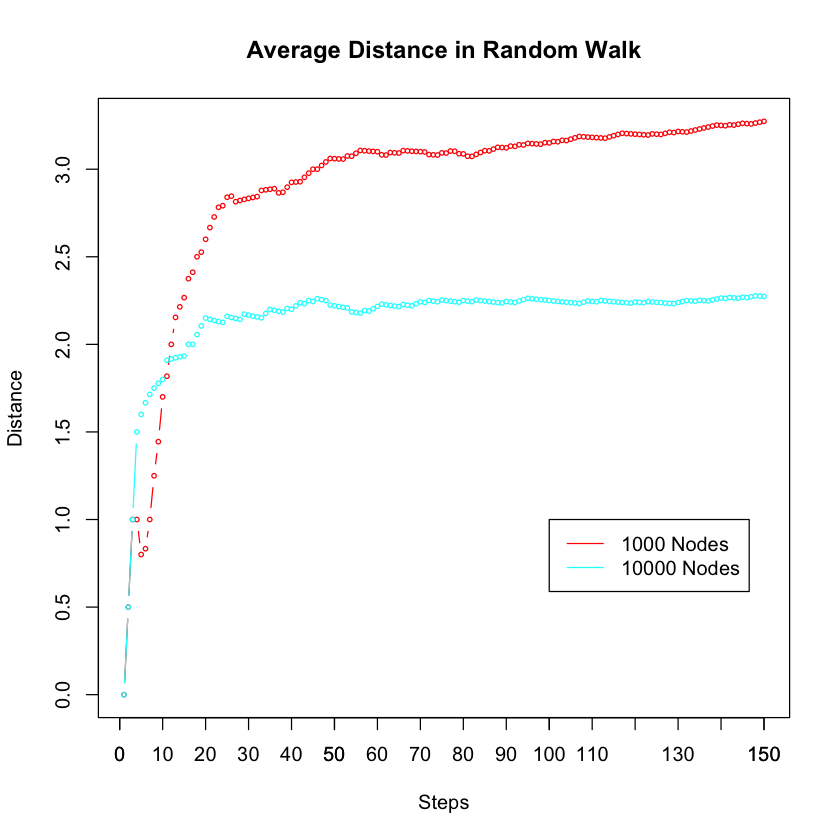

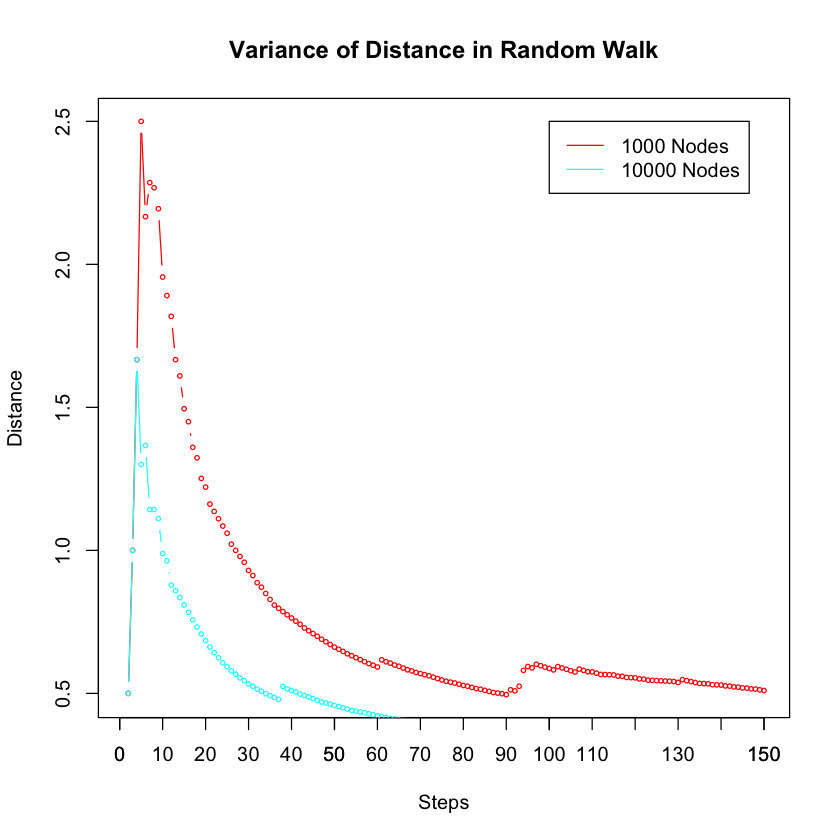

In [6]:
# Additional codes to generate the overlayed graph for Problem 1(d) in the report
RANDOM_WALK_STEPS <- 150

# N = 1000, Average
NUM_OF_NODES <- 1000
g <- erdos.renyi.game(NUM_OF_NODES, 0.01, directed=F)

node_num <- runif(1, 1, NUM_OF_NODES)  # a randomly selected node
dist <- c()  # shortest distance between starting node and current node after each step (t)
dist_mean <- c()  # mean and variance of distance after each step (t)
dist_var <- c()

rw <- random_walk(g, node_num, RANDOM_WALK_STEPS, mode="all", stuck="error")
for (steps in 1:RANDOM_WALK_STEPS) {
  dist[steps] <- distances(g, rw[1], rw[steps], mode="all")[1][1]
  dist_mean[steps] <- mean(dist[1:steps])
  dist_var[steps] <- var(dist[1:steps])
}

plot(dist_mean, type='b', cex=0.5, col=rainbow(2)[1],
     main="Average Distance in Random Walk", xlab="Steps", ylab="Distance")
axis(side=1, at=seq(0, RANDOM_WALK_STEPS, by=10))

# N = 10000, Average
NUM_OF_NODES <- 10000
g <- erdos.renyi.game(NUM_OF_NODES, 0.01, directed=F)

node_num <- runif(1, 1, NUM_OF_NODES)  # a randomly selected node
dist <- c()  # shortest distance between starting node and current node after each step (t)
dist_mean <- c()  # mean and variance of distance after each step (t)
dist_var <- c()

rw <- random_walk(g, node_num, RANDOM_WALK_STEPS, mode="all", stuck="error")
for (steps in 1:RANDOM_WALK_STEPS) {
  dist[steps] <- distances(g, rw[1], rw[steps], mode="all")[1][1]
  dist_mean[steps] <- mean(dist[1:steps])
  dist_var[steps] <- var(dist[1:steps])
}

lines(dist_mean, type='b', cex=0.5, col=rainbow(2)[2])
legend(x=100, y=1, legend=c("1000 Nodes", "10000 Nodes"), lty=1, col=c(rainbow(2)[1], rainbow(2)[2]))

# N = 1000, Variance
NUM_OF_NODES <- 1000
g <- erdos.renyi.game(NUM_OF_NODES, 0.01, directed=F)

node_num <- runif(1, 1, NUM_OF_NODES)  # a randomly selected node
dist <- c()  # shortest distance between starting node and current node after each step (t)
dist_mean <- c()  # mean and variance of distance after each step (t)
dist_var <- c()

rw <- random_walk(g, node_num, RANDOM_WALK_STEPS, mode="all", stuck="error")
for (steps in 1:RANDOM_WALK_STEPS) {
  dist[steps] <- distances(g, rw[1], rw[steps], mode="all")[1][1]
  dist_mean[steps] <- mean(dist[1:steps])
  dist_var[steps] <- var(dist[1:steps])
}

plot(dist_var, type='b', cex=0.5, col=rainbow(2)[1],
     main="Variance of Distance in Random Walk", xlab="Steps", ylab="Distance")
axis(side=1, at=seq(0, RANDOM_WALK_STEPS, by=10))

# N = 10000, Variance
NUM_OF_NODES <- 10000
g <- erdos.renyi.game(NUM_OF_NODES, 0.01, directed=F)

node_num <- runif(1, 1, NUM_OF_NODES)  # a randomly selected node
dist <- c()  # shortest distance between starting node and current node after each step (t)
dist_mean <- c()  # mean and variance of distance after each step (t)
dist_var <- c()

rw <- random_walk(g, node_num, RANDOM_WALK_STEPS, mode="all", stuck="error")
for (steps in 1:RANDOM_WALK_STEPS) {
  dist[steps] <- distances(g, rw[1], rw[steps], mode="all")[1][1]
  dist_mean[steps] <- mean(dist[1:steps])
  dist_var[steps] <- var(dist[1:steps])
}

lines(dist_var, type='b', cex=0.5, col=rainbow(2)[2])
legend(x=100, y=2.5, legend=c("1000 Nodes", "10000 Nodes"), lty=1, col=c(rainbow(2)[1], rainbow(2)[2]))